# The Perceptron

## Introduction
In this Jupyter notebook, we delve into the Perceptron, a fundamental machine learning model renowned for its simplicity and effectiveness in binary classification tasks.
The Perceptron is a single-layer linear classifier that excels in scenarios where data separation is linear and the classification decision is clear-cut.

## Dataset 
In this part, we will utilize "palmer_penguins" dataset which states some biological features of species including their habitats(island),bill length,bill depth,flipper length,body mass and sex.In this case,I want to determine their sex according to other biological features and it is a binary classification problem.


## Implementation
The Perceptron is fundamentally designed for classification problems and there are so many biological features.So we will use a subset of features for simplicity.Given the nature of the Perceptron and for demonstration purposes, we'll limit the number of features to a few key ones, such as bill_depth,bill_depth.But I will focus on two biological features which are "body_mass" and "flipper_length" and explore the relationship among sex and these two.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

# Import a nice function for plotting decision boudaries
#from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

# Alternatively you may run:
# df = pd.read_csv("https://raw.githubusercontent.com/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/main/Lecture_3/Datasets/iris_dataset.csv")

In [45]:
df.iloc[:10]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [46]:
# First remove the rows whose sex column is null and store the desired species values in the numpy array y
df = df.dropna(subset=['sex'])
y = df.iloc[0:100].sex

# Convert each entry of y with female to -1 and  male to 1
y = np.where(y == 'Female', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_depth_mm", "body_mass_g"]].iloc[:100].values

Splitting Splitting the dataset into training and testing sets. This is a crucial step in machine learning to evaluate the performance of your model. We split the data into two parts:

  1.Training set: Used to train the model. It learns from this data.
  
  2.Testing set: Used to test the trained model. This helps in evaluating how well the model performs on unseen data. Here, we keep 20% of the data for testing (test_size=0.2) and the rest for training. The 'random_state' parameter ensures that the split is reproducible.

In [47]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

The Perceptron is a fundamental building block in neural networks, acting as a linear classifier.
Here, we define a Perceptron class with key functionalities:
- __init__: This is the constructor for the Perceptron class.
'eta' is the learning rate (a small number to scale the weight updates).
'epochs' represents the number of passes over the training dataset.   
- train: This function trains the Perceptron.
It initializes the weights to small random numbers (self.w_).
For each epoch (full pass over the training data), it updates the weights based on the error made in predictions.
- net_input: This function calculates the weighted sum of inputs.
- predict: This function makes predictions.
If the net input is greater than zero, the function returns 1, else -1.
It applies the decision rule of the Perceptron to predict the class label.

In [48]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next we can instantiate an instance of the Perceptron class and also train this instance over 1000 epochs by running the following code in the cell below.

In [49]:
# Experiment with different hyperparameters
eta_values = [0.1, 0.01, 0.001]
epoch_values = [10, 100, 1000]

best_accuracy = 0
best_percep = None
best_eta = 0
best_epoch = 0

# Hyperparameter tuning loop
for eta in eta_values:
    for epoch in epoch_values:
        percep = Perceptron(epochs=epoch, eta=eta)
        percep.train(X_train, y_train)
        y_pred = percep.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_percep = percep
            best_eta = eta
            best_epoch = epoch


In [40]:
# Output the best parameters and corresponding accuracy
print(f"Best Hyperparameters -> Eta: {best_eta}, Epochs: {best_epoch}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters -> Eta: 0.1, Epochs: 100
Best Accuracy: 0.95


Notice that it is important to compute some metrics to evaluate the performance of the model in classification.
And usually, what we do is to compute Precision and Recall.
Mathmatically,here are the expressions:
$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

In [42]:
#Compute Precision and Recall
percep = Perceptron(epochs=100, eta=0.1)
percep.train(X_train, y_train)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7333333333333333
Recall: 1.0


Note: you may need to restart the kernel to use updated packages.


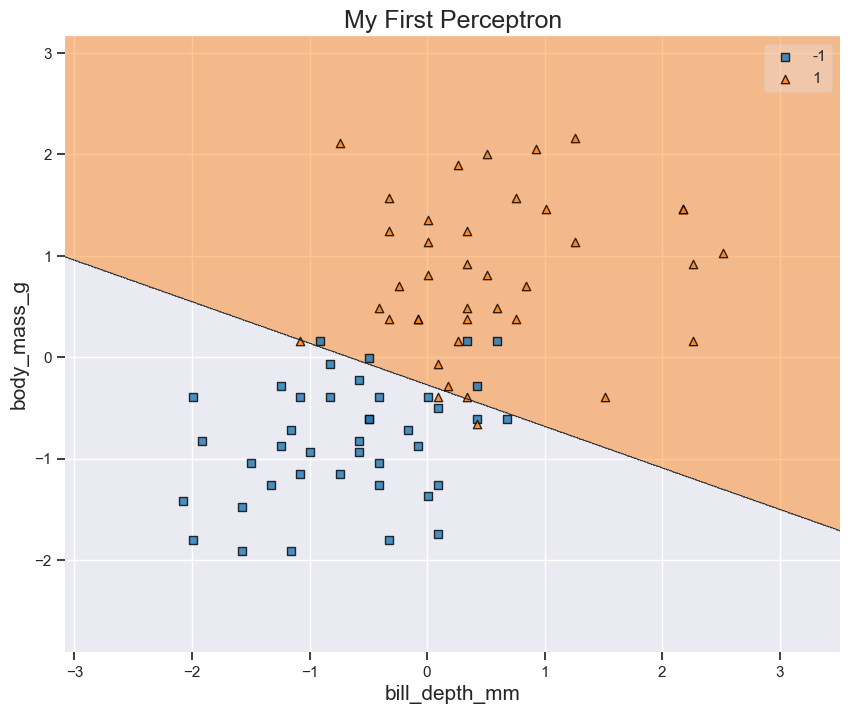

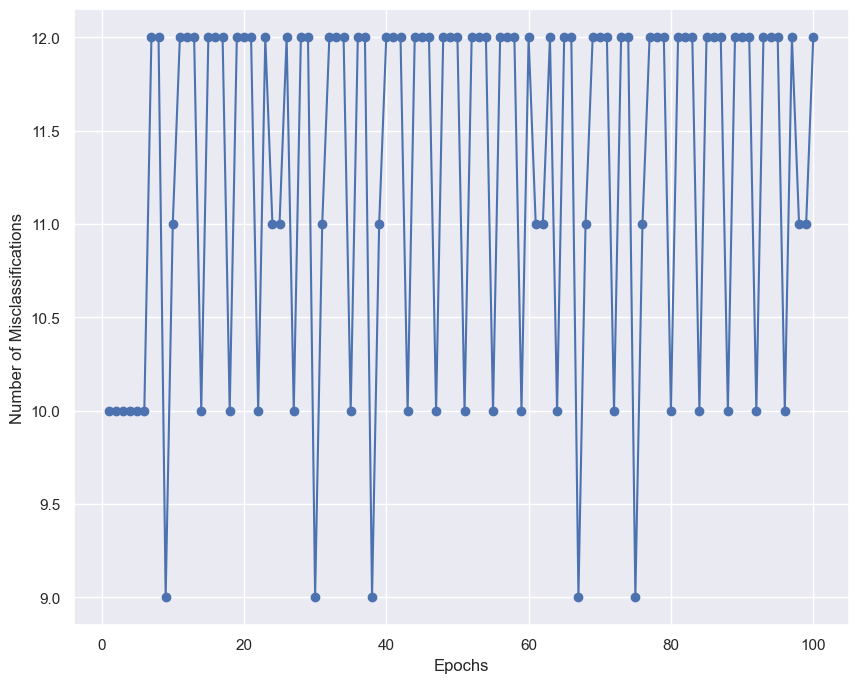

In [43]:
#Make decision region plot
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (10, 8))
plot_decision_regions(X_train, y_train, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill_depth_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.show()

#Error analysis
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

## Conclusion
The Perceptron model, tailored with the best hyperparameters (learning rate of 0.1 and 100 epochs), achieved a promising accuracy of approximately 73.3% on our housing dataset.

This performance suggests the model is reasonably effective in classifying houses into cost categories, despite the simplicity of the approach. Future work might explore refining the feature set or applying more complex algorithms to improve upon this foundation, potentially increasing the model's accuracy and reliability in predictions.